In [49]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
def wordcloud_dataframe( wc):
    word_freq_dict = wc.words_
    word_freq_df = pd.DataFrame(word_freq_dict, index=range(len(word_freq_dict))).T.reset_index().iloc[:,:2]
    word_freq_df.columns = ['word', 'freq']
    return word_freq_df

In [51]:
lang = "spanish"

In [52]:
df = pd.read_csv(f'data/{lang}_data.csv')

In [53]:
stoplist = stopwords.words(lang)

In [54]:

specifict_stoplist = ['num', 'ser', 'tener', 'poder', 'haber', 'hacer', 'ver', 'lugar', 'ir']
stoplist = stoplist + specifict_stoplist

In [55]:
text = ' '.join(df.text_norm.to_list())

## WORDCLOUD GENERAL

In [56]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',stopwords = stoplist,
                min_font_size = 10).generate(text)

In [57]:
df_wc = wordcloud_dataframe(wordcloud)

df_wc.to_csv(f'data/wordcloud/wordcloud_{lang}.csv', index=False)

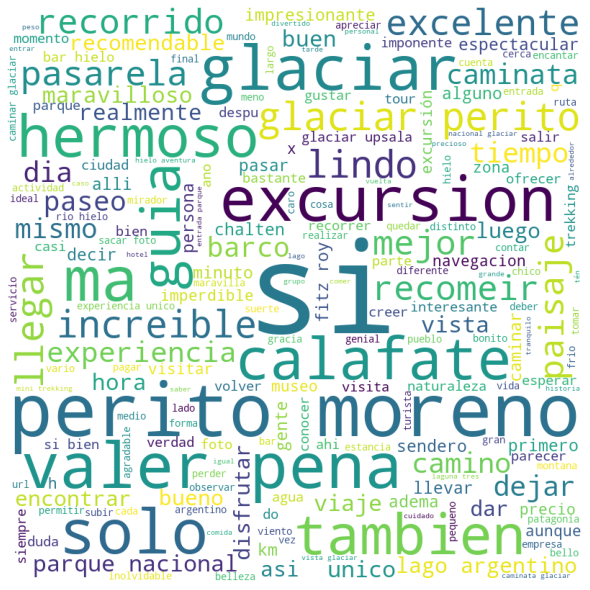

In [58]:

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### WORDCLOUD POR CATEGORIA

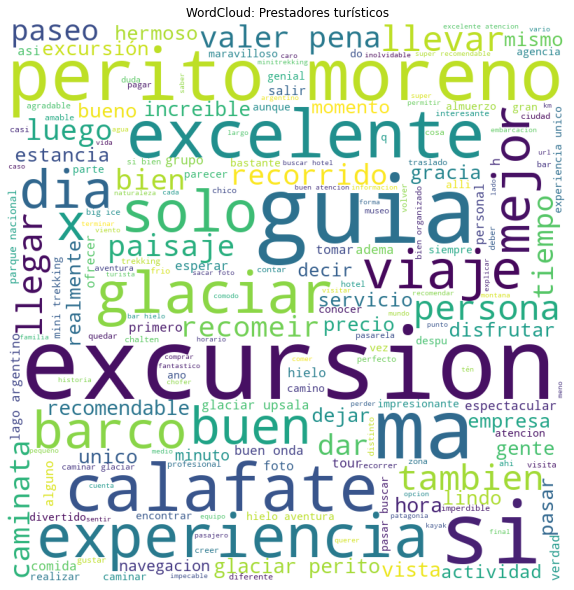

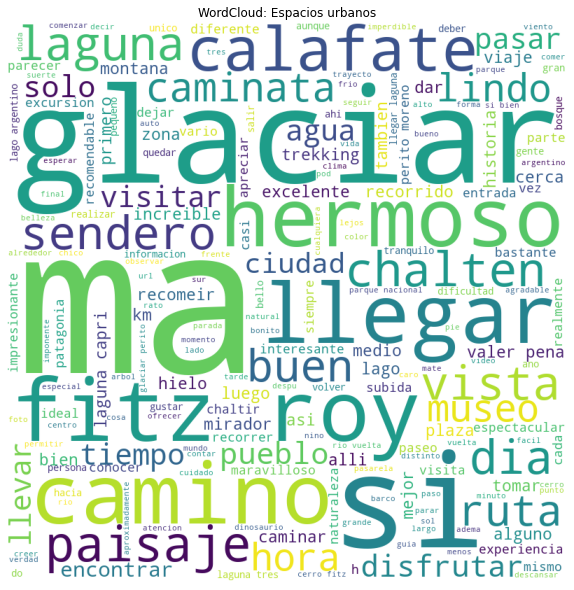

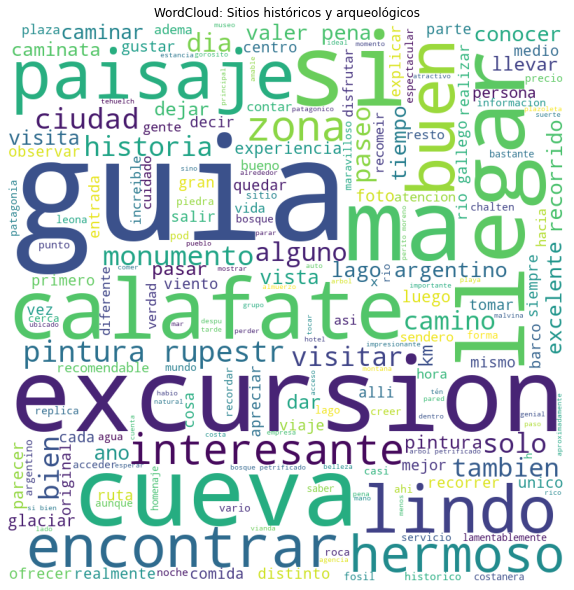

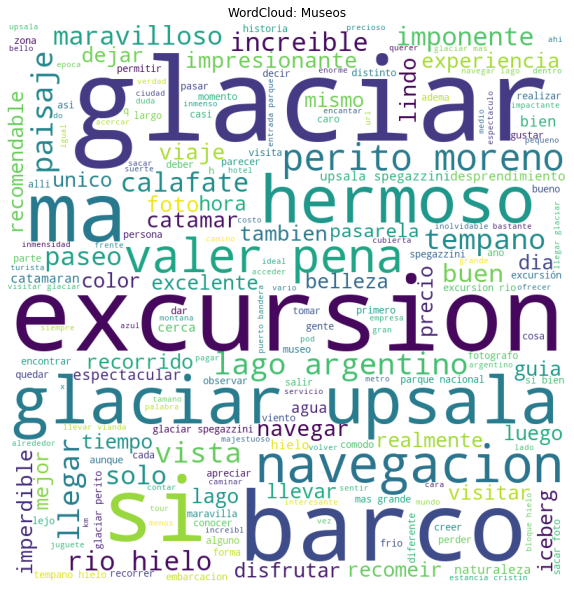

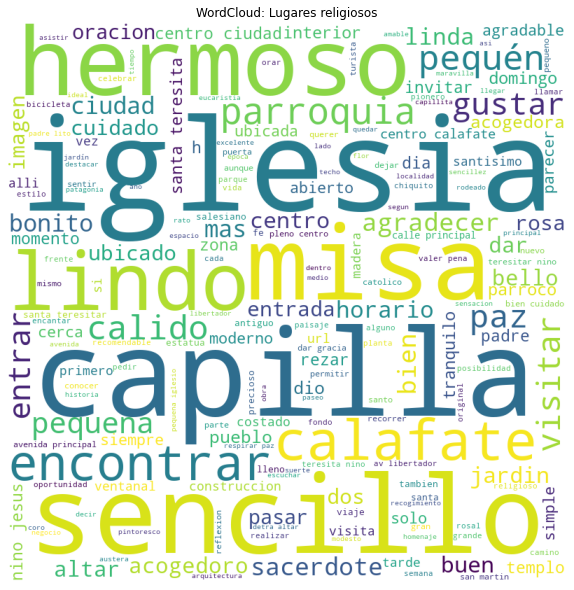

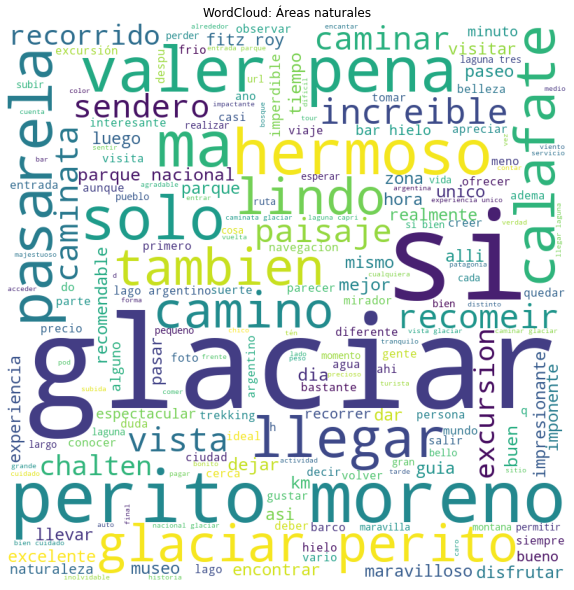

In [59]:
for cat in list(set(df.categoria_souldata)):
    text = ' '.join(df.loc[df.categoria_souldata == cat].text_norm.dropna().to_list())
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',stopwords = stoplist ,
                min_font_size = 10).generate(text)
    
    df_wc = wordcloud_dataframe(wordcloud)

    df_wc.to_csv(f'data/wordcloud/wordcloud_{lang}_{cat}.csv', index=False)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'WordCloud: {cat}')
    plt.tight_layout(pad = 0)


### WORDCLOUD POR COMENTARIO POSITIVO / NEGATIVO

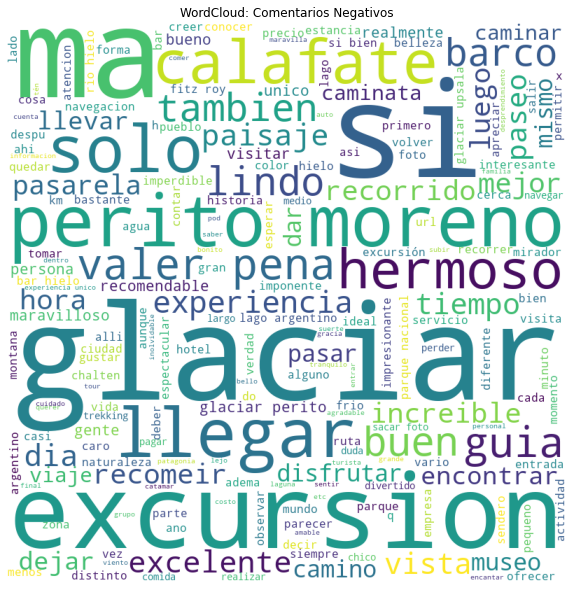

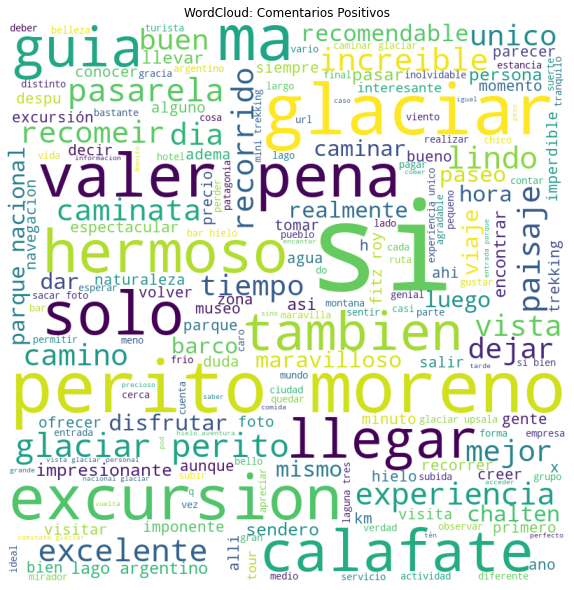

In [60]:
for t in list(set(df.target)):
    text = ' '.join(df.loc[df.target == t].text_norm.dropna().to_list())
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',stopwords = stoplist ,
                min_font_size = 10).generate(text)
    if t == 1:
        titulo = 'Comentarios Positivos'
    else:
        titulo = 'Comentarios Negativos'
    
    df_wc = wordcloud_dataframe(wordcloud)

    df_wc.to_csv(f'data/wordcloud/wordcloud_{lang}_{titulo}.csv', index=False)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'WordCloud: {titulo}')
    plt.tight_layout(pad = 0)
